In [1]:
!pip install ccxt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 30.6 MB/s 
     |████████████████████████████████| 1.1 MB 32.3 MB/s 
     |████████████████████████████████| 4.1 MB 47.1 MB/s 
     |████████████████████████████████| 271 kB 29.2 MB/s 
     |████████████████████████████████| 1.2 MB 50.0 MB/s 
     |████████████████████████████████| 94 kB 3.8 MB/s 
     |████████████████████████████████| 291 kB 57.3 MB/s 
     |████████████████████████████████| 144 kB 61.3 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
# { import the libraries
import ccxt
from datetime import datetime
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# }

In [3]:
# { load exchange
exchange = ccxt.binance({
    'options': {
        'adjustForTimeDifference': True,
    },

})
# }

In [4]:
# { load data as function
def fetch(symbol: str, timeframe: str, limit: int):
    print(f"Fetching {symbol} new bars for {datetime.now().isoformat()}")

    bars = exchange.fetch_ohlcv(
        symbol, timeframe=timeframe, limit=limit)  # fetch ohlcv
    df = pd.DataFrame(bars[:-1], columns=['timestamp',
                      'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    #df = df.set_index(pd.DatetimeIndex(df.timestamp))
    return df
# }

In [5]:
# { set the symbol for data function
BTC = fetch('BTC/USDT', '1h', 900)
# }

BTC 

Fetching BTC/USDT new bars for 2022-07-23T21:02:42.327771


,timestamp,open,high,low,close,volume
0,2022-06-16 10:00:00,21273.86,21361.26,20852.35,21243.04,6892.28020
1,2022-06-16 11:00:00,21247.90,21295.80,20893.69,21044.55,4312.07086
2,2022-06-16 12:00:00,21044.56,21510.20,20921.99,21144.79,5194.96209
3,2022-06-16 13:00:00,21144.80,21364.00,20901.01,21022.04,5445.38015
4,2022-06-16 14:00:00,21022.04,21140.93,20745.00,20924.33,5742.24321
...,...,...,...,...,...,...
894,2022-07-23 16:00:00,22216.90,22290.57,22174.22,22189.54,3586.01499
895,2022-07-23 17:00:00,22189.54,22256.58,21947.22,22033.92,7055.08530
896,2022-07-23 18:00:00,22031.84,22239.18,21934.57,22076.02,6295.40825
897,2022-07-23 19:00:00,22076.02,22332.00,22031.31,22272.50,4872.55609


In [20]:
#{ function for calculate povit high
def PIVOTHIGH(data:str =BTC['high'] , left_bar:int =14 , right_bar:int=14):
  data_len=np.size(data)
  pivothigh=[]
  for i in range(data_len - right_bar) :
    pivothigh.append(np.nan) 
    pivot = True
    if i > left_bar:
      for x in range(left_bar +1):
        if data[i-x]> data[i]:
          pivot = False
      for x in range(right_bar +1):
        if data[i+x] > data[i]:
          pivot = False
    if pivot is True:
      pivothigh[np.size(pivothigh)-1]=data[i]
  for i in range(right_bar):
    pivothigh.append(np.nan)
  return np.round(pivothigh,2)



In [21]:
# { use pivothigh function 
BTC['pivothigh'] = PIVOTHIGH(BTC.high, 14, 14)

BTC['pivothighfill'] = BTC['pivothigh'].fillna(method='ffill')
# }

BTC

,timestamp,open,high,low,close,volume,pivothigh,pivothighfill
0,2022-06-16 10:00:00,21273.86,21361.26,20852.35,21243.04,6892.28020,21361.26,21361.26
1,2022-06-16 11:00:00,21247.90,21295.80,20893.69,21044.55,4312.07086,21295.80,21295.80
2,2022-06-16 12:00:00,21044.56,21510.20,20921.99,21144.79,5194.96209,21510.20,21510.20
3,2022-06-16 13:00:00,21144.80,21364.00,20901.01,21022.04,5445.38015,21364.00,21364.00
4,2022-06-16 14:00:00,21022.04,21140.93,20745.00,20924.33,5742.24321,21140.93,21140.93
...,...,...,...,...,...,...,...,...
894,2022-07-23 16:00:00,22216.90,22290.57,22174.22,22189.54,3586.01499,NaN,23756.49
895,2022-07-23 17:00:00,22189.54,22256.58,21947.22,22033.92,7055.08530,NaN,23756.49
896,2022-07-23 18:00:00,22031.84,22239.18,21934.57,22076.02,6295.40825,NaN,23756.49
897,2022-07-23 19:00:00,22076.02,22332.00,22031.31,22272.50,4872.55609,NaN,23756.49


In [26]:
# {  plot the data
fig = go.Figure()

fig.add_trace(go.Candlestick(x=BTC.index,
                             open=BTC['open'],
                             high=BTC['high'],
                             low=BTC['low'],
                             close=BTC['close'],
                             showlegend=False))

fig.add_trace(go.Scatter(x=BTC.index,
                         y=BTC['pivothighfill'],
                         opacity=0.7,
                         line=dict(color='green', width=2),
                         name='pivothighfill'))


fig.show()
# }

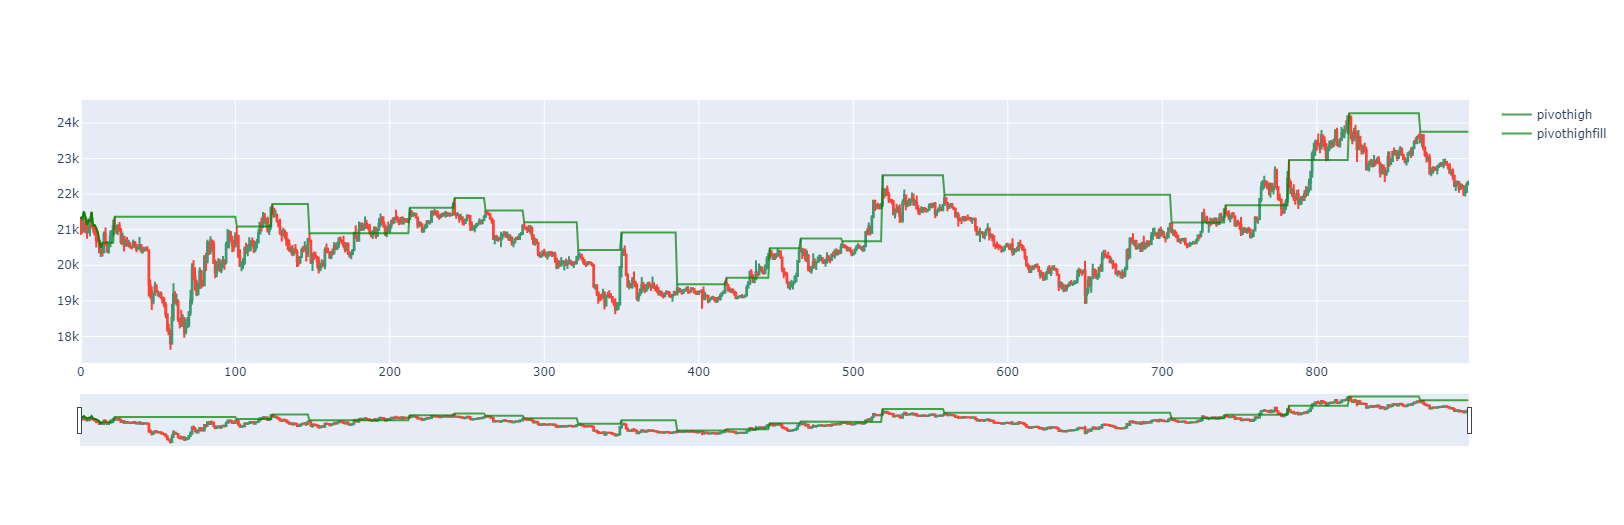

In [24]:
#{ function for calculate povit low
def PIVOTLOW(data:str =BTC['low'] , left_bar:int =14 , right_bar:int=14):
  data_len=np.size(data)
  pivotlow=[]
  for i in range(data_len - right_bar) :
    pivotlow.append(np.nan) 
    pivot = True
    if i > left_bar:
      for x in range(left_bar +1):
        if data[i-x] < data[i]:
          pivot = False
      for x in range(right_bar +1):
        if data[i+x] < data[i]:
          pivot = False
    if pivot is True:
      pivotlow[np.size(pivotlow)-1]=data[i]
  for i in range(right_bar):
    pivotlow.append(np.nan)
  return np.round(pivotlow,2)
#}

In [29]:
#{ use pivotlow function to calculate pivot low
BTC['pivotlow'] = PIVOTHIGH(BTC.low, 14, 14)

BTC['pivotlowfill'] = BTC['pivotlow'].fillna(method='ffill')
# }

BTC
#}

,timestamp,open,high,low,close,volume,pivothigh,pivothighfill,pivotlow,pivotlowfill
0,2022-06-16 10:00:00,21273.86,21361.26,20852.35,21243.04,6892.28020,21361.26,21361.26,20852.35,20852.35
1,2022-06-16 11:00:00,21247.90,21295.80,20893.69,21044.55,4312.07086,21295.80,21295.80,20893.69,20893.69
2,2022-06-16 12:00:00,21044.56,21510.20,20921.99,21144.79,5194.96209,21510.20,21510.20,20921.99,20921.99
3,2022-06-16 13:00:00,21144.80,21364.00,20901.01,21022.04,5445.38015,21364.00,21364.00,20901.01,20901.01
4,2022-06-16 14:00:00,21022.04,21140.93,20745.00,20924.33,5742.24321,21140.93,21140.93,20745.00,20745.00
...,...,...,...,...,...,...,...,...,...,...
894,2022-07-23 16:00:00,22216.90,22290.57,22174.22,22189.54,3586.01499,NaN,23756.49,NaN,22341.46
895,2022-07-23 17:00:00,22189.54,22256.58,21947.22,22033.92,7055.08530,NaN,23756.49,NaN,22341.46
896,2022-07-23 18:00:00,22031.84,22239.18,21934.57,22076.02,6295.40825,NaN,23756.49,NaN,22341.46
897,2022-07-23 19:00:00,22076.02,22332.00,22031.31,22272.50,4872.55609,NaN,23756.49,NaN,22341.46


In [30]:
# {  plot the data
fig = go.Figure()

fig.add_trace(go.Candlestick(x=BTC.index,
                             open=BTC['open'],
                             high=BTC['high'],
                             low=BTC['low'],
                             close=BTC['close'],
                             showlegend=False))

fig.add_trace(go.Scatter(x=BTC.index,
                         y=BTC['pivothighfill'],
                         opacity=0.7,
                         line=dict(color='green', width=2),
                         name='pivothighfill'))

fig.add_trace(go.Scatter(x=BTC.index,
                         y=BTC['pivotlowfill'],
                         opacity=0.7,
                         line=dict(color='red', width=2),
                         name='pivotlowhfill'))

fig.show()
# }

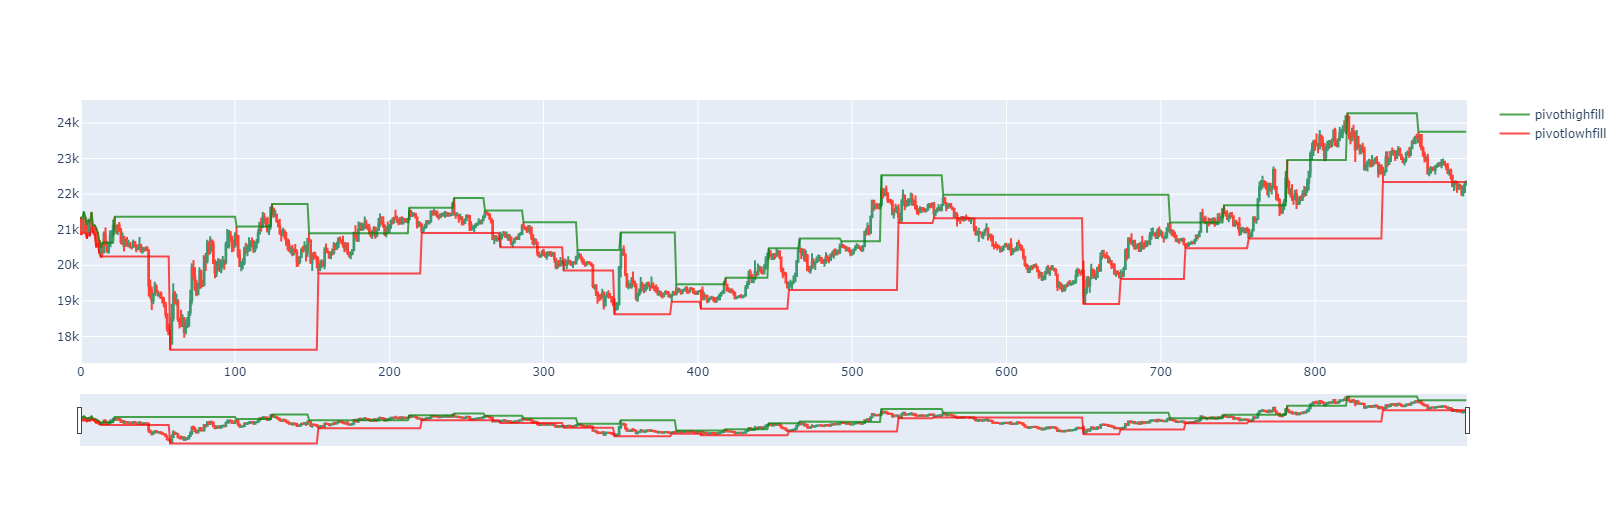